In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
# from rdkit import Chem
import os

from torch_geometric.loader import DataLoader
import torch
from utils_data import TestbedDataset

/data/conghao001/anaconda3/envs/gnndrug/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = 'root_folder/root_020/Saliency/GNNExplainer/'

# Integrated Gradients

## One instance

### Decode feature matrix

for one drug, if we decode along the feature matrix, there will be an attibution matrix of size (num_atom x num_feature)
- how to decide the baseline??
- to decide the saliency of one atom, add the saliency scores obtained by all features (does this make sense?)


In [2]:
drug_path = 'root_folder/root_002/Saliency/Drug/GCNNet/9.npy'
drug_saliency = np.load(drug_path)
drug_saliency.shape

(74, 192)

In [4]:
drug_sal = np.sum(drug_saliency, axis=1)
drug_sal.shape

(74,)

In [5]:
drug_sal

array([5.72698098e+01, 5.87640966e+01, 3.81660902e+01, 2.02629281e+01,
       1.39559163e+01, 5.15650478e+00, 2.25081590e-01, 8.03731059e-02,
       4.01393576e-02, 3.24094412e-02, 4.01393576e-02, 8.03731059e-02,
       1.72573140e+00, 1.91731012e+00, 7.53781092e-01, 2.93331933e-01,
       1.73615518e-01, 2.50964194e-01, 6.23479498e-01, 8.35384420e-01,
       8.11343899e-01, 5.70150065e-01, 2.24776253e-01, 7.24573484e-02,
       1.42680280e-02, 7.39319520e-03, 2.08159661e-03, 0.00000000e+00,
       0.00000000e+00, 1.62699300e-03, 6.83667214e-02, 1.49844595e-02,
       7.66769313e-03, 2.78686154e-03, 0.00000000e+00, 0.00000000e+00,
       2.88309285e-03, 7.92492614e-03, 1.57183519e-02, 4.71933697e-02,
       1.50110580e-02, 7.91694604e-03, 2.15553543e-03, 0.00000000e+00,
       0.00000000e+00, 2.52142377e-03, 4.48203763e-02, 1.49795172e-01,
       3.88421885e-01, 5.84764716e-01, 5.61570580e-01, 5.29350311e-01,
       2.09256552e-01, 1.67784892e-01, 3.39197025e-01, 8.66563574e-01,
      

In [6]:
norm = np.linalg.norm(drug_sal)
drug_sal1 = drug_sal / norm
drug_sal1

array([4.27606805e-01, 4.38763944e-01, 2.84968292e-01, 1.51293779e-01,
       1.04202280e-01, 3.85012023e-02, 1.68057865e-03, 6.00108280e-04,
       2.99701754e-04, 2.41986095e-04, 2.99701754e-04, 6.00108280e-04,
       1.28852268e-02, 1.43156552e-02, 5.62812982e-03, 2.19017195e-03,
       1.29630563e-03, 1.87383191e-03, 4.65522894e-03, 6.23742359e-03,
       6.05792430e-03, 4.25704308e-03, 1.67829884e-03, 5.41005031e-04,
       1.06532672e-04, 5.52015205e-05, 1.55423054e-05, 0.00000000e+00,
       0.00000000e+00, 1.21479935e-05, 5.10462239e-04, 1.11881930e-04,
       5.72510678e-05, 2.08081878e-05, 0.00000000e+00, 0.00000000e+00,
       2.15267019e-05, 5.91717060e-05, 1.17361560e-04, 3.52370754e-04,
       1.12080528e-04, 5.91121223e-05, 1.60943719e-05, 0.00000000e+00,
       0.00000000e+00, 1.88262885e-05, 3.34652725e-04, 1.11845029e-03,
       2.90016401e-03, 4.36616383e-03, 4.19298409e-03, 3.95241046e-03,
       1.56242051e-03, 1.25277108e-03, 2.53262507e-03, 6.47022371e-03,
      

In [14]:
drug_sal2 = np.round(drug_sal1, 2)
drug_sal2

array([0.43, 0.44, 0.28, 0.15, 0.1 , 0.04, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.01, 0.02, 0.02, 0.03, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.08,
       0.21, 0.11, 0.32, 0.31, 0.25, 0.16, 0.34, 0.22])

In [13]:
drug_rank = drug_sal1.argsort()
drug_rank = drug_rank + 1
drug_rank

array([45, 44, 36, 35, 29, 28, 30, 27, 43, 46, 34, 37, 26, 33, 42, 38, 63,
       62, 64, 25, 32, 41, 39, 10, 61, 65,  9, 11, 47, 40, 31, 24,  8, 12,
       48, 54, 17, 53, 60, 23,  7, 18, 16, 55, 49, 52, 51, 22, 50, 19, 15,
       21, 20, 56, 13, 14, 57, 58, 59,  6, 66,  5, 68,  4, 72, 67, 74, 71,
        3, 70, 69, 73,  1,  2])

In [8]:
data_folder = "data/"
df2 = pd.read_csv(data_folder+'drugs_smile.csv', sep='\t')
df2

,drug_id,SMILES
0,1559,CCNC(=O)C1=C(C(=C2C=C(C(=CC2=O)O)C(C)C)ON1)C3=...
1,1058,CS(=O)(=O)N1CCN(CC1)CC2=CC3=C(S2)C(=NC(=N3)C4=...
2,1088,CCC1=C2CN3C(=CC4=C(C3=O)COC(=O)C4(CC)O)C2=NC5=...
3,1549,CNC(=O)CN1CCC(CC1)OC2=C(C=C3C(=C2)C(=NC=N3)NC4...
4,1073,C1=C(C(=O)NC(=O)N1)F
...,...,...
164,1629,CC1=CN=C(N=C1NCC2=CC=C(C=C2)N3C=CN=N3)C4=CC=CC...
165,1799,C=CC(=O)N1CCCC(C1)N2C3=NC=NC(=C3C(=N2)C4=CC=C(...
166,1835,CC(=CC(=O)OC1CC2=CC(CC3(C(O3)C4C1C(=C)C(=O)O4)...
167,1908,CC(C)NC1=NC=C(C(=C1)C2=CNC(=C2)C(=O)NC(CO)C3=C...


### Decode cell line features

In [5]:
cell_path = 'root_folder/root_020/Saliency/IG/CellLine/GAT_Edge/0_KIN001-266_910706.npy'
cell_saliency = np.load(cell_path)
cell_saliency = cell_saliency.reshape(-1)
cell_saliency

array([2.48441673e-06, 6.33429891e-05, 3.40226226e-04, 4.82947790e-03,
       1.73507006e-02, 9.36279956e-04, 7.32137690e-03, 1.16107586e-02,
       2.61995258e-02, 8.20469864e-05, 2.57963959e-03, 1.49186819e-02,
       9.62274239e-02, 1.60096273e-03, 2.60472714e-03, 8.97722723e-03,
       7.42706424e-03, 1.60535932e-02, 1.23202738e-02, 3.66077526e-03,
       9.72083106e-04, 2.80504566e-02, 4.03335290e-03, 7.75153562e-03,
       1.34705684e-02, 1.22360070e-05, 3.58963822e-03, 4.07308752e-03,
       7.80433065e-04, 8.74922708e-02, 9.84359387e-02, 4.50480236e-03,
       4.37944650e-04, 1.42033824e-02, 1.00832441e-04, 1.44294616e-03,
       4.72405076e-02, 1.32875202e-03, 2.54479226e-02, 1.89217696e-04,
       2.60092314e-03, 3.81007591e-03, 2.65790779e-03, 2.05319980e-03,
       1.39532961e-02, 7.54278002e-03, 4.49104350e-04, 1.29778001e-03,
       2.29183954e-03, 4.65142834e-02, 7.23470742e-03, 3.50097030e-03,
       8.86109119e-04, 2.57827383e-03, 2.57932269e-04, 3.66265467e-03,
      

In [6]:
cell_saliency.shape

(1000,)

In [29]:
# cell_sal = np.sum(cell_saliency, axis=1)
# cell_sal.shape

In [8]:
# norm = np.linalg.norm(cell_saliency)
# cell_sal1 = cell_saliency / norm
# cell_sal1

In [7]:
min_ss = np.min(cell_saliency)
max_ss = np.max(cell_saliency)

cell_sal1 = (cell_saliency - min_ss) / (max_ss - min_ss)
cell_sal1

array([2.48441673e-06, 6.33429891e-05, 3.40226226e-04, 4.82947790e-03,
       1.73507006e-02, 9.36279956e-04, 7.32137690e-03, 1.16107586e-02,
       2.61995258e-02, 8.20469864e-05, 2.57963959e-03, 1.49186819e-02,
       9.62274239e-02, 1.60096273e-03, 2.60472714e-03, 8.97722723e-03,
       7.42706424e-03, 1.60535932e-02, 1.23202738e-02, 3.66077526e-03,
       9.72083106e-04, 2.80504566e-02, 4.03335290e-03, 7.75153562e-03,
       1.34705684e-02, 1.22360070e-05, 3.58963822e-03, 4.07308752e-03,
       7.80433065e-04, 8.74922708e-02, 9.84359387e-02, 4.50480236e-03,
       4.37944650e-04, 1.42033824e-02, 1.00832441e-04, 1.44294616e-03,
       4.72405076e-02, 1.32875202e-03, 2.54479226e-02, 1.89217696e-04,
       2.60092314e-03, 3.81007591e-03, 2.65790779e-03, 2.05319980e-03,
       1.39532961e-02, 7.54278002e-03, 4.49104350e-04, 1.29778001e-03,
       2.29183954e-03, 4.65142834e-02, 7.23470742e-03, 3.50097030e-03,
       8.86109119e-04, 2.57827383e-03, 2.57932269e-04, 3.66265467e-03,
      

In [48]:
cell_sal1.shape

(735,)

In [49]:
cell_sal2 = np.round(cell_sal1, 2)
cell_sal2

array([0.01, 0.  , 0.01, 0.01, 0.01, 0.  , 0.02, 0.01, 0.01, 0.01, 0.01,
       0.  , 0.01, 0.  , 0.02, 0.01, 0.02, 0.02, 0.01, 0.01, 0.02, 0.04,
       0.02, 0.04, 0.03, 0.02, 0.06, 0.05, 0.02, 0.01, 0.06, 0.  , 0.04,
       0.  , 0.04, 0.03, 0.03, 0.02, 0.05, 0.11, 0.04, 0.06, 0.  , 0.02,
       0.07, 0.01, 0.02, 0.05, 0.02, 0.05, 0.07, 0.  , 0.01, 0.02, 0.04,
       0.01, 0.06, 0.09, 0.08, 0.08, 0.07, 0.08, 0.06, 0.06, 0.  , 0.01,
       0.01, 0.05, 0.03, 0.05, 0.04, 0.07, 0.01, 0.  , 0.03, 0.02, 0.  ,
       0.01, 0.04, 0.  , 0.03, 0.03, 0.02, 0.  , 0.04, 0.02, 0.02, 0.06,
       0.06, 0.04, 0.02, 0.05, 0.02, 0.01, 0.05, 0.01, 0.02, 0.06, 0.  ,
       0.02, 0.03, 0.04, 0.01, 0.06, 0.02, 0.05, 0.  , 0.06, 0.02, 0.05,
       0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.  , 0.01, 0.03, 0.  ,
       0.  , 0.03, 0.06, 0.06, 0.02, 0.01, 0.  , 0.01, 0.01, 0.08, 0.03,
       0.04, 0.  , 0.06, 0.03, 0.03, 0.04, 0.01, 0.01, 0.08, 0.1 , 0.02,
       0.01, 0.05, 0.01, 0.  , 0.01, 0.03, 0.  , 0.

In [50]:
cell_sal2.shape

(735,)

In [51]:
len(cell_sal2)

735

In [52]:
temp = np.argsort(-1*cell_sal2)
# rank2 = temp.argsort()
rank2 = np.empty_like(temp)
rank2[temp] = np.arange(len(cell_sal2))
rank2
# cell_sal3 = cell_sal2[rank2]

array([487, 620, 540, 539, 538, 608, 361, 537, 536, 535, 534, 604, 533,
       622, 355, 532, 353, 352, 531, 530, 368, 239, 370, 236, 277, 384,
        90, 135, 382, 529,  89, 663, 233, 716, 230, 270, 271, 350, 144,
         4, 228,  82, 665, 373,  42, 528, 372, 154, 351, 152,  32, 714,
       527, 330, 227, 526, 107,  11,  15,  16,  41,  17, 108, 106, 712,
       541, 543, 149, 276, 148, 226,  38, 560, 715, 281, 338, 708, 544,
       225, 706, 282, 284, 343, 705, 215, 424, 398,  66,  67, 221, 438,
       134, 434, 559, 153, 558, 430,  70, 703, 426, 293, 218, 557,  76,
       428, 162, 707,  73, 435, 156, 556, 555, 554, 553, 732, 552, 551,
       729, 550, 253, 728, 727, 255,  61,  62, 423, 549, 733, 548, 547,
        30, 258, 217, 724,  63, 261, 263, 216, 546, 545,  19,   9, 409,
       525, 123, 524, 719, 523, 243, 700, 522, 420, 502, 231, 129, 222,
       319, 416, 698, 689, 124, 312, 562, 405, 314, 219, 220, 666, 500,
       333,  43, 339, 499, 667, 498, 497, 103, 122, 223, 224, 50

In [53]:
temp.shape

(735,)

In [54]:
cell_sal3 = cell_sal2[temp]
cell_sal3

array([0.13, 0.12, 0.12, 0.11, 0.11, 0.11, 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.09, 0.09, 0.09, 0.09, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08,
       0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.07, 0.07,
       0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07,
       0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07,
       0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.06, 0.06, 0.06, 0.06, 0.06,
       0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06,
       0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06,
       0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06,
       0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.

In [55]:
cell_sal3[:50]

array([0.13, 0.12, 0.12, 0.11, 0.11, 0.11, 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.09, 0.09, 0.09, 0.09, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08,
       0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.07, 0.07,
       0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07,
       0.07, 0.07, 0.07, 0.07, 0.07, 0.07])

In [56]:
np.sum(cell_sal3)

20.230000000000004

<Figure size 432x288 with 0 Axes>

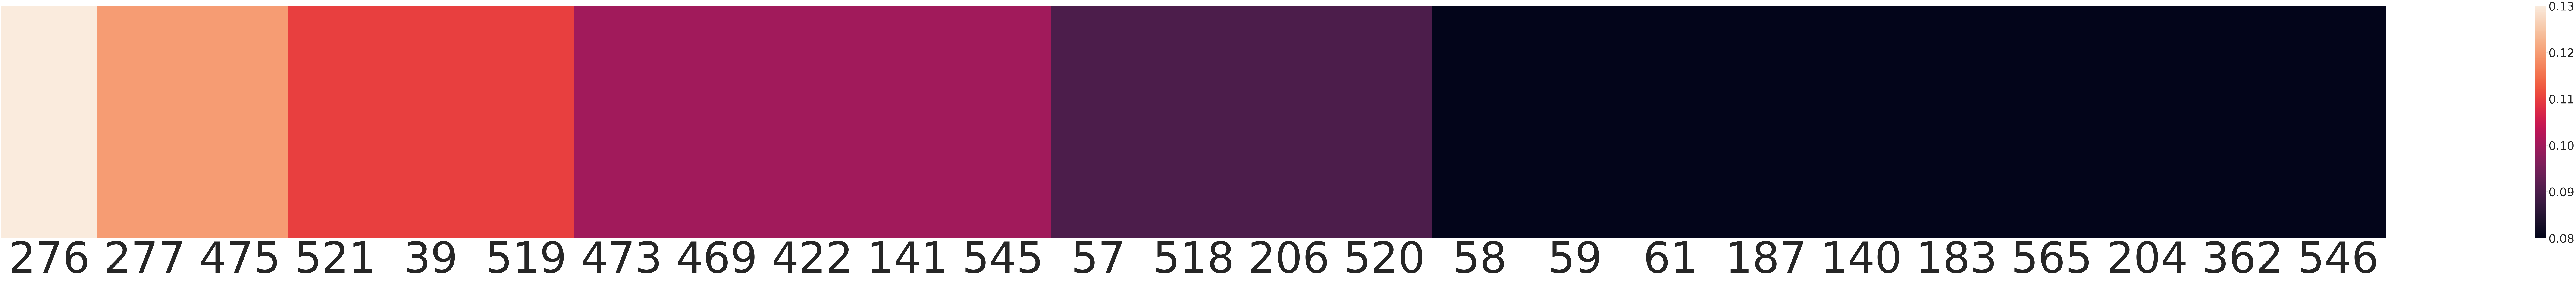

In [65]:
plt.clf()
fig, ax = plt.subplots(figsize=(250, 20))
sns.set(font_scale=5)


res = sns.heatmap(cell_sal3[:25].reshape((1, -1)))
# plt.xticks(np.arange(100), temp[:100])
res.set_xticklabels(temp[:25], fontsize = 200)
res.set_yticklabels([])

plt.show()

In [66]:
fig.savefig("827_Temozolomide_1298350.png")

#### Aggregate across the drugs
1. accumulate the saliency scores of all cell lines' reaction with one drug
2. normalize the score
3. rank the genes and display top 50(?) genes

In [3]:
def make_drug_dict(dir):
    drug_dict = dict()
    sal_dict = dict()
    for filename in os.listdir(dir):
        drug_name = filename.split('_')[1]
        one = np.load(os.path.join(dir, filename))
        if drug_name not in drug_dict.keys() and drug_name not in sal_dict.keys():
            drug_dict[drug_name] = 1
            sal_dict[drug_name] = one
        else:
            drug_dict[drug_name] += 1
            sal_dict[drug_name] = np.add(sal_dict[drug_name], one)
    
    for k, v in sal_dict.items():
        sal_dict[k] = v/drug_dict[k]
    
    return drug_dict, sal_dict

In [4]:
cell_ss_dir = 'root_folder/root_020/Saliency/IG/CellLine/GAT_Edge'
drug_dict, sal_dict =  make_drug_dict(cell_ss_dir)

In [5]:
print(drug_dict)

{'KIN001-266': 76, 'SL0101': 64, 'Tivozanib': 66, 'Obatoclax Mesylate': 61, 'PAC-1': 58, '(5Z)-7-Oxozeaenol': 61, 'Palbociclib': 51, 'Linifanib': 62, 'Pelitinib': 66, 'BMS-754807': 58, 'Luminespib': 54, 'BIX02189': 59, 'ZM447439': 57, 'Motesanib': 58, 'Selisistat': 61, 'Pictilisib': 124, 'YK-4-279': 70, 'JNK-9L': 57, 'Olaparib': 122, 'Serdemetan': 84, 'Cabozantinib': 69, 'TW 37': 63, 'PF-4708671': 69, 'AICA Ribonucleotide': 49, 'TAK-715': 70, 'PD173074': 44, 'Bexarotene': 59, 'Tretinoin': 69, 'SB216763': 47, 'Fedratinib': 76, 'Phenformin': 65, 'HG-5-88-01': 37, 'BX-912': 57, 'FH535': 68, 'EHT-1864': 71, 'Quizartinib': 56, 'Midostaurin': 67, 'Sepantronium bromide': 52, 'PLX-4720': 122, 'JNK Inhibitor VIII': 51, 'Bicalutamide': 124, 'CP724714': 58, 'NVP-BHG712': 61, 'XMD8-85': 17, 'PD0325901': 46, 'Etoposide': 65, 'AR-42': 63, 'AZD6482': 119, 'Alectinib': 80, 'CCT007093': 63, 'SNX-2112': 58, 'Vorinostat': 58, 'Tubastatin A': 86, 'STF-62247': 59, 'Tanespimycin': 62, 'BMS-345541': 66, 'Mas

In [6]:
sal_dict['WIKI4']

array([[[0.00471572, 0.00865002, 0.01098339, 0.01849614, 0.01079829,
         0.02173318, 0.01937936, 0.02591   , 0.04459923, 0.01879113,
         0.01565576, 0.04595953, 0.0225187 , 0.03240081, 0.03004656,
         0.02765667, 0.03586095, 0.10212065, 0.02435147, 0.033115  ,
         0.0253889 , 0.0713456 , 0.04085014, 0.06242163, 0.03508893,
         0.04725118, 0.05548337, 0.07466702, 0.05453198, 0.06305581,
         0.02942941, 0.08906198, 0.05682958, 0.038264  , 0.04596372,
         0.07105613, 0.10276696, 0.0476471 , 0.04000583, 0.0916687 ,
         0.06393626, 0.06948509, 0.08820696, 0.03149323, 0.08051256,
         0.06812875, 0.16073813, 0.07761396, 0.0514535 , 0.14687022,
         0.08609682, 0.11968121, 0.06433905, 0.1306611 , 0.06138981,
         0.10662277, 0.06638316, 0.10817025, 0.0738729 , 0.20942908,
         0.11449026, 0.06825779, 0.15866886, 0.12184136, 0.07451371,
         0.10504813, 0.08050541, 0.15607302, 0.1131864 , 0.04894615,
         0.14141977, 0.1111179 , 0

In [7]:
def normalize_ss(sal_dict):
    for k, v in sal_dict.items():
        max_ss = np.max(v)
        min_ss = np.min(v)
        sal_dict[k] = (v - min_ss) / (max_ss - min_ss)
    
    return sal_dict

In [8]:
norm_sal_dict = normalize_ss(sal_dict)
norm_sal_dict['WIKI4']

array([[[0.00760918, 0.0139575 , 0.01772258, 0.02984501, 0.01742391,
         0.03506823, 0.03127014, 0.04180786, 0.07196442, 0.03032099,
         0.02526181, 0.07415938, 0.03633572, 0.0522813 , 0.04848252,
         0.04462625, 0.05786451, 0.16477983, 0.03929304, 0.05343369,
         0.04096702, 0.11512182, 0.06591497, 0.10072229, 0.05661879,
         0.07624356, 0.08952685, 0.1204812 , 0.0879917 , 0.10174559,
         0.0474867 , 0.14370863, 0.09169907, 0.06174202, 0.07416614,
         0.11465474, 0.16582271, 0.07688241, 0.0645526 , 0.14791478,
         0.10316627, 0.11211975, 0.14232899, 0.05081684, 0.12991344,
         0.10993119, 0.25936383, 0.12523633, 0.08302433, 0.23698683,
         0.1389241 , 0.19311519, 0.1038162 , 0.21083212, 0.09905737,
         0.17204436, 0.10711454, 0.17454134, 0.11919983, 0.33793055,
         0.18473918, 0.11013941, 0.25602489, 0.19660077, 0.12023383,
         0.16950355, 0.12990191, 0.2518363 , 0.18263531, 0.07897853,
         0.22819209, 0.17929761, 0

In [9]:
from utils_preproc import preproc_gene_expr, save_gene_expr_matrix_X

In [43]:
_, _, genes = save_gene_expr_matrix_X()
genes = genes.values
gene_list = [g.split(' (')[0] for g in genes]
gene_list

['KRT19',
 'SPARC',
 'C19orf33',
 'VIM',
 'UCHL1',
 'TGFBI',
 'KRT7',
 'FN1',
 'KRT8',
 'FXYD3',
 'S100P',
 'KRT18',
 'CD74',
 'SLPI',
 'EPCAM',
 'TACSTD2',
 'IFI27',
 'S100A6',
 'LCN2',
 'S100A14',
 'COL1A2',
 'SPINT2',
 'SERPINE1',
 'IGFBP3',
 'KRT17',
 'MT1E',
 'CLDN4',
 'CAV1',
 'IGFBP7',
 'CD24',
 'HLA-DRA',
 'TM4SF1',
 'MAL2',
 'SPP1',
 'NNMT',
 'SFN',
 'MGST1',
 'EFEMP1',
 'SRGN',
 'S100A16',
 'ELF3',
 'COL1A1',
 'THBS1',
 'THY1',
 'CLDN7',
 'RAB25',
 'ANXA1',
 'DKK1',
 'MMP2',
 'IFITM1',
 'TFPI2',
 'CCN1',
 'GPX2',
 'S100A2',
 'COL6A2',
 'FSTL1',
 'LCP1',
 'S100A4',
 'TINAGL1',
 'LGALS1',
 'ARHGDIB',
 'ALDH1A1',
 'BST2',
 'ALDH1A3',
 'AKR1C2',
 'CDH1',
 'MYL9',
 'ANXA3',
 'DMKN',
 'COL6A3',
 'PLAU',
 'CRIP1',
 'COL3A1',
 'ST14',
 'TGM2',
 'EEF1A2',
 'CCDC80',
 'TIMP3',
 'CDKN2A',
 'CCN2',
 'DKK3',
 'LAMC2',
 'IGFBP2',
 'F3',
 'AREG',
 'IGFBP5',
 'TPM2',
 'IL32',
 'CD44',
 'RBP1',
 'IFITM2',
 'CYBA',
 'AKR1C3',
 'GJA1',
 'EMP1',
 'BASP1',
 'AXL',
 'MMP14',
 'COL4A2',
 'IFITM3',


In [53]:
gene_list = np.array(gene_list)
gene_list

array(['KRT19', 'SPARC', 'C19orf33', 'VIM', 'UCHL1', 'TGFBI', 'KRT7',
       'FN1', 'KRT8', 'FXYD3', 'S100P', 'KRT18', 'CD74', 'SLPI', 'EPCAM',
       'TACSTD2', 'IFI27', 'S100A6', 'LCN2', 'S100A14', 'COL1A2',
       'SPINT2', 'SERPINE1', 'IGFBP3', 'KRT17', 'MT1E', 'CLDN4', 'CAV1',
       'IGFBP7', 'CD24', 'HLA-DRA', 'TM4SF1', 'MAL2', 'SPP1', 'NNMT',
       'SFN', 'MGST1', 'EFEMP1', 'SRGN', 'S100A16', 'ELF3', 'COL1A1',
       'THBS1', 'THY1', 'CLDN7', 'RAB25', 'ANXA1', 'DKK1', 'MMP2',
       'IFITM1', 'TFPI2', 'CCN1', 'GPX2', 'S100A2', 'COL6A2', 'FSTL1',
       'LCP1', 'S100A4', 'TINAGL1', 'LGALS1', 'ARHGDIB', 'ALDH1A1',
       'BST2', 'ALDH1A3', 'AKR1C2', 'CDH1', 'MYL9', 'ANXA3', 'DMKN',
       'COL6A3', 'PLAU', 'CRIP1', 'COL3A1', 'ST14', 'TGM2', 'EEF1A2',
       'CCDC80', 'TIMP3', 'CDKN2A', 'CCN2', 'DKK3', 'LAMC2', 'IGFBP2',
       'F3', 'AREG', 'IGFBP5', 'TPM2', 'IL32', 'CD44', 'RBP1', 'IFITM2',
       'CYBA', 'AKR1C3', 'GJA1', 'EMP1', 'BASP1', 'AXL', 'MMP14',
       'COL4A2', 'IFIT

In [11]:
def rank_ss(sal_dict):
    rank_dict = dict()
    for k, v in sal_dict.items():
        temp = np.argsort(-1*(v.reshape(-1)))
        rank_dict[k] = temp
        
    return rank_dict

In [12]:
rank_dict = rank_ss(sal_dict)
rank_dict['WIKI4']

array([547, 515, 408,  99, 210, 228, 158, 277, 573, 564, 128, 252, 790,
       234, 853, 914, 229, 804, 777,  88, 793, 432, 842, 279, 802, 365,
       250, 309, 772, 860, 241,  59, 859,  86, 283, 287, 673, 595, 358,
       664, 274, 310, 201, 220, 485, 827, 326, 655, 318, 769, 101, 203,
       211, 142, 353, 129, 282, 606, 601, 666, 301, 168, 427, 215,  90,
       212, 508, 397, 892, 880, 218, 308, 645, 702, 208, 559, 114, 622,
       245, 151,  91, 123, 417, 117, 107, 106, 188, 269, 296, 686, 251,
       176, 942,  46, 291, 393, 236, 592, 368,  62, 459, 255, 788,  67,
       344, 197, 717, 839, 822, 153, 660, 889, 625, 110, 635, 496, 782,
       558, 527, 491, 200, 909, 246,  75,  49, 105,  78, 609, 650, 340,
       334, 152, 820, 610, 120, 589, 405, 295, 554, 293, 549, 100, 422,
       693,  70, 579, 649, 757,  83, 172, 780, 812, 644, 260, 544,  97,
       429,  74, 315, 713, 125, 801, 391, 567, 590, 177, 231, 196, 632,
       781, 478, 115, 143, 339,  82, 448, 452, 497, 265, 874, 59

In [34]:
k = 'Olaparib'
rnk = rank_dict[k]
ss = sal_dict[k].reshape(-1)
ranked_ss = ss[rnk]
ranked_ss

array([1.        , 0.9666608 , 0.71404618, 0.70352864, 0.67467922,
       0.66359034, 0.65223316, 0.63075396, 0.6123526 , 0.61134984,
       0.6094057 , 0.60490133, 0.60253384, 0.59243289, 0.58745857,
       0.58357118, 0.56516335, 0.53437347, 0.53429278, 0.53131583,
       0.52920224, 0.52622596, 0.52376646, 0.52164882, 0.52027556,
       0.50957492, 0.50056295, 0.49894044, 0.49638352, 0.49568323,
       0.48956018, 0.4864316 , 0.48469405, 0.4841757 , 0.48230191,
       0.48023869, 0.4801823 , 0.48004942, 0.47064049, 0.46994243,
       0.46957949, 0.46713049, 0.46641456, 0.46469291, 0.4638636 ,
       0.46368078, 0.46314091, 0.45995786, 0.45960668, 0.45551258,
       0.45258815, 0.4476118 , 0.43832561, 0.43426314, 0.43232408,
       0.43057669, 0.42842663, 0.42580759, 0.42403408, 0.42377717,
       0.42219929, 0.42213172, 0.4218597 , 0.42084114, 0.42075668,
       0.41863187, 0.41705826, 0.41704411, 0.41661327, 0.41408803,
       0.41406073, 0.41223213, 0.41183817, 0.40814093, 0.40757

In [54]:
ranked_gene_list = gene_list[rnk]
ranked_gene_list

array(['TMSB4X', 'ANXA2', 'LDHB', 'GSTP1', 'MT2A', 'S100A10', 'APP',
       'RAB13', 'LGALS1', 'HLA-C', 'IFITM3', 'AKR1B1', 'COTL1', 'PHGDH',
       'ASPH', 'S100A11', 'LY6E', 'ITGB5', 'ID3', 'S100A13', 'IFI30',
       'NIBAN2', 'SERPINH1', 'CBR1', 'NQO1', 'GLUL', 'CD9', 'MFGE8',
       'IFI6', 'ISG15', 'TPM2', 'MDK', 'ID2', 'BEX3', 'PFN2', 'TIMP2',
       'STXBP2', 'CYBA', 'LAPTM4B', 'LAMA5', 'ID1', 'PYGL', 'CLU',
       'PDLIM1', 'DDR1', 'TUBB6', 'LMNA', 'CD44', 'FXYD5', 'CALD1',
       'FSCN1', 'MSN', 'CKB', 'ASS1', 'FABP5', 'TIMP1', 'ITGA3', 'SDC1',
       'TCEAL9', 'FAT1', 'TUBB3', 'AHNAK', 'TPM1', 'HTATIP2', 'TXNIP',
       'OCIAD2', 'CD99', 'SDC4', 'FADS2', 'HSPA1A', 'TUBA4A', 'LGALS3',
       'CST3', 'F11R', 'CDKN1A', 'LGALS3BP', 'PTPRF', 'MXRA7', 'DCBLD2',
       'PTK7', 'RAB34', 'VAMP8', 'SCRN1', 'FKBP9', 'IFITM2', 'JUP',
       'PALLD', 'EPHA2', 'HLA-B', 'CNN3', 'CASP4', 'GSN', 'PSMB9',
       'ANXA1', 'TMEM54', 'PLAUR', 'ATP1B1', 'TNFRSF12A', 'LAMB2',
       'PEG10', 'EMP3'

In [36]:
top_n = 30
index = ranked_gene_list[:top_n]
values = ranked_ss[:top_n]

In [37]:
index.values

array(['TMSB4X (7114)', 'ANXA2 (302)', 'LDHB (3945)', 'GSTP1 (2950)',
       'MT2A (4502)', 'S100A10 (6281)', 'APP (351)', 'RAB13 (5872)',
       'LGALS1 (3956)', 'HLA-C (3107)', 'IFITM3 (10410)', 'AKR1B1 (231)',
       'COTL1 (23406)', 'PHGDH (26227)', 'ASPH (444)', 'S100A11 (6282)',
       'LY6E (4061)', 'ITGB5 (3693)', 'ID3 (3399)', 'S100A13 (6284)',
       'IFI30 (10437)', 'NIBAN2 (64855)', 'SERPINH1 (871)', 'CBR1 (873)',
       'NQO1 (1728)', 'GLUL (2752)', 'CD9 (928)', 'MFGE8 (4240)',
       'IFI6 (2537)', 'ISG15 (9636)'], dtype=object)

<Figure size 432x288 with 0 Axes>

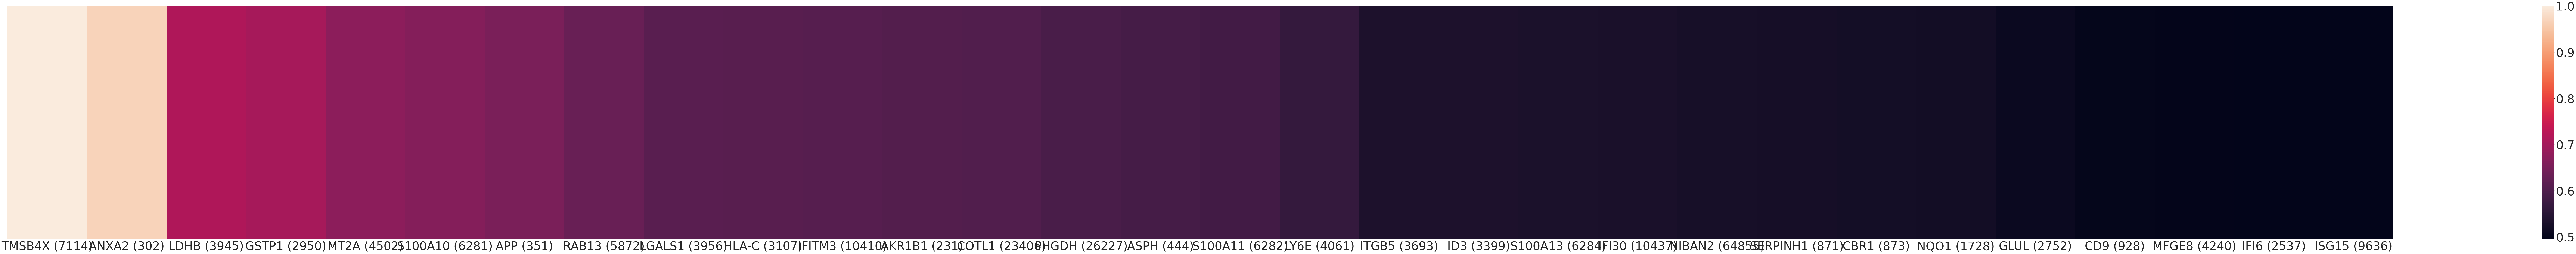

In [40]:
plt.clf()
fig, ax = plt.subplots(figsize=(250, 20))
sns.set(font_scale=5)


res = sns.heatmap(values.reshape(1, -1))
# plt.xticks(np.arange(100), temp[:100])
res.set_xticklabels(index)
res.set_yticklabels([])

# plt.show()
fig.savefig('Olaparib_gene_saliency.png')

##### Compile into funcitons

In [60]:
def draw_one_drug(save_path, drug_name, ranked_ss, ranked_genes, top_n=25):
    values = ranked_ss[:top_n]
    index = ranked_genes[:top_n]
    
    plt.clf()
    fig, ax = plt.subplots(figsize=(250, 20))
    sns.set(font_scale=5)


    res = sns.heatmap(values.reshape(1, -1))
    # plt.xticks(np.arange(100), temp[:100])
    res.set_xticklabels(index)
    res.set_yticklabels([])

    # plt.show()
    fig.savefig(save_path + drug_name + '.png')

In [61]:
def draw_gene_saliency(rank_dict, sal_dict, gene_list, save_path):
    i = 0
    for drug in sal_dict.keys():
        i += 1
        print('working on ', drug)
        print('progress: ', i, '/', len(sal_dict))
        rnk = rank_dict[drug]
        sal_score = sal_dict[drug].reshape(-1)
        ranked_ss = sal_score[rnk]
        ranked_genes = gene_list[rnk]

        draw_one_drug(save_path, drug, ranked_ss, ranked_genes)

In [62]:
len(sal_dict)

223

working on  KIN001-266
progress:  1 / 223
working on  SL0101
progress:  2 / 223
working on  Tivozanib
progress:  3 / 223
working on  Obatoclax Mesylate
progress:  4 / 223
working on  PAC-1
progress:  5 / 223
working on  (5Z)-7-Oxozeaenol
progress:  6 / 223
working on  Palbociclib
progress:  7 / 223
working on  Linifanib
progress:  8 / 223
working on  Pelitinib
progress:  9 / 223
working on  BMS-754807
progress:  10 / 223
working on  Luminespib
progress:  11 / 223
working on  BIX02189
progress:  12 / 223
working on  ZM447439
progress:  13 / 223
working on  Motesanib
progress:  14 / 223
working on  Selisistat
progress:  15 / 223
working on  Pictilisib
progress:  16 / 223
working on  YK-4-279
progress:  17 / 223
working on  JNK-9L
progress:  18 / 223
working on  Olaparib
progress:  19 / 223
working on  Serdemetan
progress:  20 / 223


/tmp/ipykernel_24142/2070332842.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(250, 20))


working on  Cabozantinib
progress:  21 / 223
working on  TW 37
progress:  22 / 223
working on  PF-4708671
progress:  23 / 223
working on  AICA Ribonucleotide
progress:  24 / 223
working on  TAK-715
progress:  25 / 223
working on  PD173074
progress:  26 / 223
working on  Bexarotene
progress:  27 / 223
working on  Tretinoin
progress:  28 / 223
working on  SB216763
progress:  29 / 223
working on  Fedratinib
progress:  30 / 223
working on  Phenformin
progress:  31 / 223
working on  HG-5-88-01
progress:  32 / 223
working on  BX-912
progress:  33 / 223
working on  FH535
progress:  34 / 223
working on  EHT-1864
progress:  35 / 223
working on  Quizartinib
progress:  36 / 223
working on  Midostaurin
progress:  37 / 223
working on  Sepantronium bromide
progress:  38 / 223
working on  PLX-4720
progress:  39 / 223
working on  JNK Inhibitor VIII
progress:  40 / 223
working on  Bicalutamide
progress:  41 / 223
working on  CP724714
progress:  42 / 223
working on  NVP-BHG712
progress:  43 / 223
workin

working on  BI-2536
progress:  213 / 223
working on  GNF-2
progress:  214 / 223
working on  Rapamycin
progress:  215 / 223
working on  Erlotinib
progress:  216 / 223
working on  A-770041
progress:  217 / 223
working on  Camptothecin
progress:  218 / 223
working on  Parthenolide
progress:  219 / 223
working on  NVP-TAE684
progress:  220 / 223
working on  Dasatinib
progress:  221 / 223
working on  BMS-509744
progress:  222 / 223
working on  TGX221
progress:  223 / 223


<Figure size 432x288 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

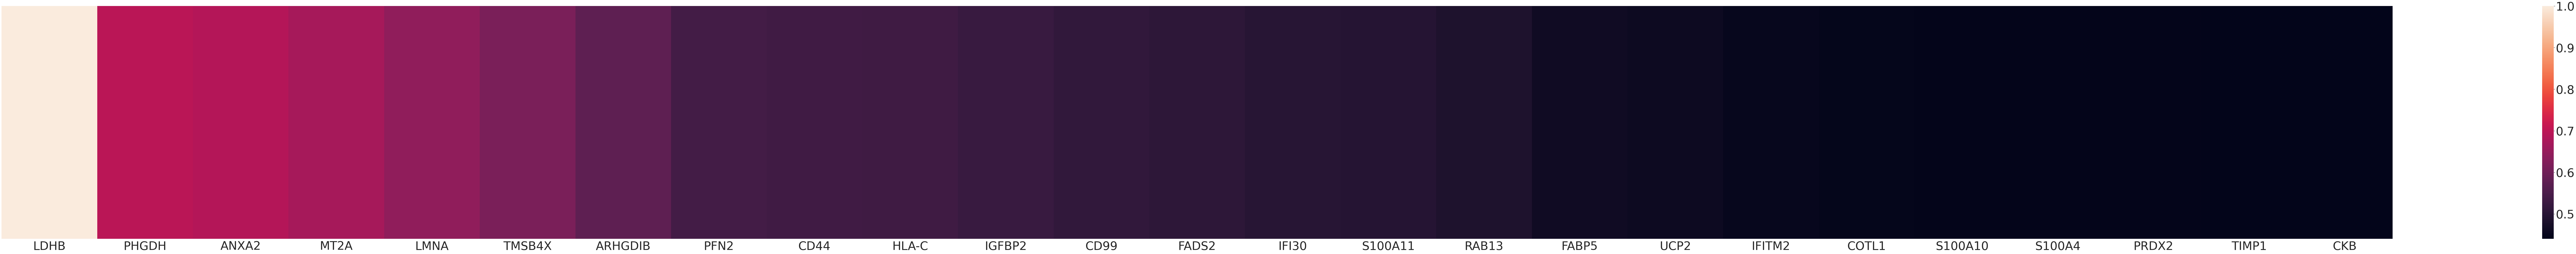

In [63]:
save_path = 'root_folder/root_020/SaliencyMap/IG/CellLine/GAT_Edge/'
os.makedirs(save_path, exist_ok=True)
draw_gene_saliency(rank_dict, sal_dict, gene_list, save_path)

### Decode edges

In [41]:
drug_path = 'root_folder/root_010/Saliency/Bonds/GCN/0_ZM447439_910944.npy'
drug_saliency = np.load(drug_path)
drug_saliency.shape

FileNotFoundError: [Errno 2] No such file or directory: 'root_folder/root_010/Saliency/Bonds/GCN/0_ZM447439_910944.npy'

In [3]:
drug_saliency

array([2.48651867e-01, 1.00000000e+00, 8.62972502e-02, 5.13686340e-01,
       9.26098535e-02, 1.61039935e-02, 1.87078602e-02, 1.11422732e-01,
       1.71499217e-02, 1.38293178e-01, 4.56860660e-01, 6.57679778e-02,
       6.00790490e-02, 8.38509164e-01, 2.03361122e-01, 4.48156186e-02,
       1.24145066e-01, 4.47597770e-01, 1.10815505e-01, 1.83448087e-02,
       4.86267177e-01, 4.81749400e-01, 9.96485772e-02, 3.49921795e-01,
       3.44002690e-01, 4.32759571e-01, 6.30067611e-01, 4.81628118e-02,
       5.64444547e-01, 2.32782007e-02, 2.57945530e-01, 9.97448768e-02,
       1.34424267e-01, 1.43029179e-01, 1.76312617e-02, 1.02447350e-02,
       1.47948987e-02, 4.18935038e-02, 1.53463558e-01, 6.69968962e-02,
       1.47949020e-02, 3.61981299e-03, 4.82611034e-02, 1.43029179e-01,
       6.21532028e-02, 2.41255107e-01, 2.85844751e-01, 2.56820242e-01,
       1.62973716e-01, 4.84187081e-02, 6.38807359e-01, 4.55403981e-02,
       5.50824712e-02, 4.75124767e-03, 6.67292270e-02, 1.19101767e-02,
      

In [7]:
agg_ss = np.zeros(int(drug_saliency.shape[0]/2))
agg_ss.shape

(42,)

In [9]:
for i in range(agg_ss.shape[0]):
    agg_ss[i] = drug_saliency[2*i] + drug_saliency[2*i+1]

agg_ss

array([1.24865187, 0.59998359, 0.10871385, 0.13013059, 0.1554431 ,
       0.52262864, 0.89858821, 0.24817674, 0.57174284, 0.12916031,
       0.96801658, 0.44957037, 0.77676226, 0.67823042, 0.58772275,
       0.35769041, 0.27745345, 0.027876  , 0.0566884 , 0.22046045,
       0.01841471, 0.19129028, 0.30340831, 0.54266499, 0.21139242,
       0.68434776, 0.05983372, 0.0786394 , 0.10040233, 0.09723016,
       0.06618496, 0.07635564, 0.09788725, 0.52297044, 0.37440925,
       0.27800776, 0.35725234, 0.05877977, 0.18508299, 0.17541439,
       0.18154214, 0.08714127])

## Drawing saliency map for all drugs and cell lines

In [34]:
import os
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import AllChem


In [3]:
d_path = 'root_folder/root_006/Saliency/Drug/GATv2/'
c_path = 'root_folder/root_006/Saliency/CellLine/GATv2/'

In [8]:
for filename in os.listdir(d_path):
    combi = filename.split('.')[0]
    print(combi)
    drug = combi.split('_')[1]
    cell_line = combi.split('_')[2]
    print(drug, cell_line)
    

0_Axitinib_907313
Axitinib 907313
1000_JQ1_724879
JQ1 724879
1001_Gemcitabine_907311
Gemcitabine 907311
1002_SB216763_1290806
SB216763 1290806
1003_Docetaxel_907073
Docetaxel 907073
1004_AZD6482_1298347
AZD6482 1298347
1005_Trametinib_909251
Trametinib 909251
1006_GSK269962A_910916
GSK269962A 910916
1007_Sorafenib_907269
Sorafenib 907269
1008_YK-4-279_910691
YK-4-279 910691
1009_Nutlin-3a (-)_906853
Nutlin-3a (-) 906853
100_Olaparib_907313
Olaparib 907313
1010_Pictilisib_909702
Pictilisib 909702
1011_Daporinad_906846
Daporinad 906846
1012_Olaparib_910915
Olaparib 910915
1013_OSI-027_1240208
OSI-027 1240208
1014_Linsitinib_1298537
Linsitinib 1298537
1015_VX-11e_684072
VX-11e 684072
1016_Entinostat_753552
Entinostat 753552
1017_SB216763_687568
SB216763 687568
1018_JQ1_949156
JQ1 949156
1019_OSI-027_910688
OSI-027 910688
101_Docetaxel_1240215
Docetaxel 1240215
1020_Cytarabine_909773
Cytarabine 909773
1021_GSK269962A_906826
GSK269962A 906826
1022_NU7441_1290730
NU7441 1290730
1023_Vinblast

In [4]:
from torch_geometric.loader import DataLoader
import torch
import numpy as np
import pandas as pd

/data/conghao001/anaconda3/envs/gnndrug/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
from utils_data import TestbedDataset

In [10]:
branch_folder = "root_folder/root_010"
dataset = 'GDSC'
test_data = TestbedDataset(root=branch_folder, dataset=dataset+'_test_mix')

Pre-processed data found: root_folder/root_010/processed/GDSC_test_mix.pt, loading ...


In [11]:
test_batch = 1
test_loader = DataLoader(test_data, batch_size=test_batch, shuffle=False)

In [12]:
next(iter(test_loader))

DataBatch(x=[38, 270], edge_index=[2, 84], y=[1], edge_features=[84, 4], smiles=[1], drug_name=[1], cell_line_name=[1], target=[1, 735], c_size=[1], batch=[38], ptr=[2])

In [26]:
# import glob
d_save_path = 'root_folder/root_006/SaliencyMap/Drug/GATv2/'
c_save_path = 'root_folder/root_006/SaliencyMap/CellLine/GATv2/'

os.makedirs(d_save_path, exist_ok=True)
os.makedirs(c_save_path, exist_ok=True)

In [28]:
for idx, data in enumerate(test_loader):
    print(idx)
    drug = data.drug_name[0]
    cell_line = data.cell_line_name[0]
    postflix = drug + '_' + cell_line +'.npy'
    filename = d_path + str(idx) + '_' + drug + '_' + cell_line + '.npy'
    
    saliency_score = np.load(filename)
    ss = np.sum(saliency_score, axis=1)
    norm = np.linalg.norm(ss)
    ss = ss / norm
    ss = np.round(ss, 2)
    
    smiles = data.smiles[0]
    mol = Chem.MolFromSmiles(smiles)
    for i, atom in enumerate(mol.GetAtoms()):
        # For each atom, set the property "molAtomMapNumber" to a custom number, let's say, the index of the atom in the molecule
        atom.SetProp("atomNote", str(ss[i]))
    Chem.Draw.MolToImageFile(mol, d_save_path + drug + '_' + cell_line + '.png', size = (1000, 1000))
#     f = [filename for filename in os.listdir(d_path) if filename.match('*_' + drug + '_' + cell_line +'.npy')]
#     filename =  glob.glob(d_path + '*' + postflix)
#     print(filename)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


# GNN Explainer
There are two outputs from gnn explainer:
1. node feature mask
2. edge mask

## Edge mask
For each pair of drug_cellLine, there is a saliency vector of size (num_edge, )

In [3]:
method = 'GAT_Edge'
drug_dir = path + 'Bonds/' + method

In [4]:
branch_folder = "root_folder/root_017"
dataset = 'GDSC'
test_data = TestbedDataset(root=branch_folder, dataset=dataset+'_test_mix')
test_batch = 1
test_loader = DataLoader(test_data, batch_size=test_batch, shuffle=False)

Pre-processed data found: root_folder/root_017/processed/GDSC_test_mix.pt, loading ...


In [5]:
len(test_data)

19105

In [10]:
file_list = os.listdir(drug_dir)
file_list[:50]

['0_Amuvatinib_907065.npy',
 '10000_Camptothecin_1299061.npy',
 '10001_Obatoclax Mesylate_925346.npy',
 '10002_AKT inhibitor VIII_909762.npy',
 '10003_YK-4-279_946354.npy',
 '10004_Navitoclax_909249.npy',
 '10005_Phenformin_906798.npy',
 '10006_JW-7-24-1_910401.npy',
 '10007_Piperlongumine_687590.npy',
 '10008_Embelin_907063.npy',
 '10009_Avagacestat_1503365.npy',
 '1000_Quizartinib_687819.npy',
 '10010_Bleomycin_753614.npy',
 '10011_Vismodegib_1298222.npy',
 '10012_Idelalisib_907787.npy',
 '10013_JQ1_905959.npy',
 '10014_AS605240_905959.npy',
 '10015_TGX221_905967.npy',
 '10016_Axitinib_907791.npy',
 '10017_SGC0946_906791.npy',
 '10018_Tanespimycin_910942.npy',
 '10019_Shikonin_924106.npy',
 '1001_UNC0638_1240198.npy',
 '10020_Tamoxifen_908136.npy',
 '10021_NVP-BHG712_908149.npy',
 '10022_EHT-1864_724879.npy',
 '10023_Tamoxifen_971774.npy',
 '10024_Enzastaurin_906804.npy',
 '10025_BI-2536_1303896.npy',
 '10026_VX-11e_908128.npy',
 '10027_Cytarabine_949155.npy',
 '10028_CCT-018159_7535

### One sample

In [29]:
one_ss = np.load(os.path.join(drug_dir, '0_Amuvatinib_907065.npy'))
one_ss.shape

(74,)

In [30]:
one_ss

array([0.5019026 , 0.47823852, 0.49837002, 0.48927367, 0.31849116,
       0.46027473, 0.49314904, 0.5249071 , 0.48280674, 0.41921628,
       0.5306403 , 0.41468808, 0.5051504 , 0.4900766 , 0.51639044,
       0.54081815, 0.46622172, 0.459222  , 0.58219147, 0.5152768 ,
       0.5324115 , 0.47674388, 0.52491313, 0.5341433 , 0.3692854 ,
       0.55958694, 0.58314276, 0.5376288 , 0.3985968 , 0.32171997,
       0.5484067 , 0.47304878, 0.5568172 , 0.56654465, 0.5077417 ,
       0.49227783, 0.45005608, 0.46651316, 0.4684859 , 0.59963405,
       0.52652997, 0.40674946, 0.62541   , 0.46781313, 0.5525559 ,
       0.5572757 , 0.54009557, 0.5809959 , 0.613338  , 0.46298993,
       0.4085846 , 0.46456265, 0.55556387, 0.49780834, 0.61825824,
       0.51607776, 0.46662524, 0.5754309 , 0.39849705, 0.4808595 ,
       0.419197  , 0.41763753, 0.5694907 , 0.55678713, 0.515651  ,
       0.5367727 , 0.60746914, 0.43065482, 0.37042013, 0.42389622,
       0.44812375, 0.6389505 , 0.5217596 , 0.47190356], dtype=

In [31]:
norm_one_ss = (one_ss - one_ss.min()) / (one_ss.max() - one_ss.min())
norm_one_ss

array([0.57233906, 0.4984949 , 0.56131566, 0.5329303 , 0.        ,
       0.4424385 , 0.5450235 , 0.6441252 , 0.51275015, 0.31431478,
       0.66201574, 0.30018446, 0.5824739 , 0.53543586, 0.61754876,
       0.69377595, 0.46099624, 0.43915343, 0.8228822 , 0.6140736 ,
       0.6675428 , 0.49383083, 0.644144  , 0.672947  , 0.15850447,
       0.7523443 , 0.8258507 , 0.6838236 , 0.24997127, 0.01007558,
       0.7174562 , 0.4823002 , 0.7437012 , 0.774056  , 0.59056014,
       0.5423049 , 0.410551  , 0.46190566, 0.46806163, 0.8773121 ,
       0.64918935, 0.2754118 , 0.95774657, 0.46596226, 0.73040384,
       0.7451321 , 0.6915211 , 0.81915146, 0.9200756 , 0.45091134,
       0.2811384 , 0.45581907, 0.7397902 , 0.5595629 , 0.9354293 ,
       0.61657304, 0.46225542, 0.8017858 , 0.24966   , 0.5066737 ,
       0.3142546 , 0.30938825, 0.7832491 , 0.74360746, 0.6152413 ,
       0.6811521 , 0.9017617 , 0.350009  , 0.1620454 , 0.32891867,
       0.40452117, 1.        , 0.6343034 , 0.47872654], dtype=

### Aggregate the saliency scores from all pairs of drug & cell line
1. drug_dict: count how many times each drug appear in the test dataset
2. drug_sal_dict:  accumulate all saliency scores for each drug, then average them by the appearing times
3. edge_index_dict & smiles_dict: record edge index and smiles of drugs

In [5]:
drug_dict = dict()
for filename in os.listdir(drug_dir):
    drug_name = filename.split('_')[1]
    if drug_name not in drug_dict.keys():
        drug_dict[drug_name] = 1
    else:
        drug_dict[drug_name] += 1

drug_dict

{'Amuvatinib': 93,
 'Camptothecin': 83,
 'Obatoclax Mesylate': 93,
 'AKT inhibitor VIII': 188,
 'YK-4-279': 82,
 'Navitoclax': 93,
 'Phenformin': 106,
 'JW-7-24-1': 77,
 'Piperlongumine': 90,
 'Embelin': 92,
 'Avagacestat': 191,
 'Quizartinib': 89,
 'Bleomycin': 103,
 'Vismodegib': 79,
 'Idelalisib': 89,
 'JQ1': 179,
 'AS605240': 91,
 'TGX221': 41,
 'Axitinib': 77,
 'SGC0946': 99,
 'Tanespimycin': 85,
 'Shikonin': 89,
 'UNC0638': 176,
 'Tamoxifen': 86,
 'NVP-BHG712': 96,
 'EHT-1864': 90,
 'Enzastaurin': 82,
 'BI-2536': 41,
 'VX-11e': 104,
 'Cytarabine': 75,
 'CCT-018159': 92,
 'Doramapimod': 84,
 'ZSTK474': 99,
 'CCT007093': 94,
 'Bexarotene': 96,
 'PD173074': 85,
 'PHA-793887': 95,
 'SB590885': 79,
 'Bortezomib': 42,
 'Tipifarnib': 76,
 'NG-25': 89,
 'Refametinib': 172,
 'AZD7762': 93,
 'KIN001-266': 94,
 'Alectinib': 92,
 'Palbociclib': 93,
 'Imatinib': 50,
 'Linsitinib': 83,
 'AZ628': 45,
 'STF-62247': 81,
 'BMS-345541': 102,
 'FMK': 94,
 'Olaparib': 157,
 'GW-2580': 100,
 'Temsirol

In [6]:
drug_sal_dict = dict()
for filename in os.listdir(drug_dir):
    drug_name = filename.split('_')[1]
    one = np.load(os.path.join(drug_dir,filename))
    if drug_name not in drug_sal_dict.keys():
        drug_sal_dict[drug_name] = one
    else:
        drug_sal_dict[drug_name] = np.add(drug_sal_dict[drug_name], one)

In [7]:
drug_sal_dict

{'Amuvatinib': array([45.386677, 46.163048, 46.260525, 44.912697, 45.562275, 46.04734 ,
        45.987003, 46.56751 , 46.004517, 45.27994 , 45.73896 , 46.661366,
        46.69115 , 45.349422, 46.04899 , 45.011555, 47.348312, 45.79888 ,
        45.54854 , 45.86994 , 46.481678, 45.941784, 45.891605, 45.039047,
        46.318222, 45.897312, 45.875862, 46.06076 , 46.08525 , 44.569683,
        46.2841  , 47.076138, 47.38684 , 46.302288, 45.410023, 46.386234,
        45.820095, 45.741337, 45.65698 , 46.786423, 45.956264, 45.59438 ,
        47.923218, 46.56275 , 46.020023, 45.501095, 45.290012, 45.932137,
        46.5326  , 46.038933, 46.057064, 45.41919 , 47.032124, 46.50643 ,
        46.816032, 46.14774 , 46.40884 , 45.2893  , 45.78697 , 46.00002 ,
        45.764687, 44.967113, 46.889217, 45.390305, 46.68076 , 46.501087,
        47.309956, 46.69654 , 45.832893, 46.03436 , 45.790062, 45.039272,
        43.965656, 45.028435], dtype=float32),
 'Camptothecin': array([41.437496, 42.832222, 40.52

In [8]:
for k, v in drug_sal_dict.items():
    drug_sal_dict[k] = v/drug_dict[k]
    drug_sal_dict[k] = (drug_sal_dict[k] - drug_sal_dict[k].min())/(drug_sal_dict[k].max() - drug_sal_dict[k].min())

drug_sal_dict

{'Amuvatinib': array([0.3590648 , 0.55523884, 0.5798689 , 0.23929855, 0.40343443,
        0.5260013 , 0.5107557 , 0.6574386 , 0.51518047, 0.33209422,
        0.44808003, 0.6811533 , 0.6886805 , 0.3496509 , 0.52641803,
        0.26427805, 0.8547325 , 0.46322057, 0.3999636 , 0.48117644,
        0.63574994, 0.4993291 , 0.48665023, 0.27122536, 0.59444773,
        0.4880922 , 0.48267233, 0.5293923 , 0.53558046, 0.1526259 ,
        0.5858259 , 0.7859583 , 0.86446714, 0.59042156, 0.36496368,
        0.61163324, 0.4685809 , 0.44868022, 0.42736486, 0.7127538 ,
        0.50298834, 0.4115471 , 1.        , 0.6562354 , 0.5190988 ,
        0.38797596, 0.33463922, 0.49689192, 0.6486172 , 0.5238772 ,
        0.5284588 , 0.36727968, 0.774837  , 0.6420046 , 0.72023475,
        0.5513702 , 0.61734587, 0.33445925, 0.46021053, 0.5140445 ,
        0.45458055, 0.2530489 , 0.73872775, 0.3599815 , 0.6860542 ,
        0.6406544 , 0.8450399 , 0.69004196, 0.47181505, 0.52272165,
        0.4609921 , 0.2712821 , 0.

In [9]:
smiles_dict = dict()
edge_index_dict = dict()
for data in test_loader:
    drug_name = data.drug_name[0]
    smiles = data.smiles[0]
    edge_index = data.edge_index.numpy()
    
    if drug_name not in smiles_dict.keys() and drug_name not in edge_index_dict.keys():
        smiles_dict[drug_name] = smiles
        edge_index_dict[drug_name] = edge_index

In [10]:
edge_index_dict

{'Amuvatinib': array([[ 0,  0,  1,  1,  2,  2,  2,  3,  3,  4,  4,  5,  5,  5,  6,  6,
          6,  7,  7,  8,  8,  9,  9, 10, 10, 10, 11, 11, 11, 12, 12, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 18, 19, 19, 19,
         20, 21, 21, 22, 22, 23, 23, 23, 24, 24, 25, 25, 25, 26, 26, 26,
         27, 27, 28, 28, 29, 29, 30, 30, 31, 31],
        [ 1,  5,  0,  2,  1,  3, 19,  2,  4,  3,  5,  4,  6,  0,  5,  7,
         11,  6,  8,  7,  9,  8, 10,  9, 11, 18, 10, 12,  6, 11, 13, 12,
         14, 18, 13, 15, 14, 16, 15, 17, 16, 18, 17, 10, 13,  2, 20, 21,
         19, 19, 22, 21, 23, 22, 24, 28, 23, 25, 24, 26, 31, 25, 27, 29,
         26, 28, 27, 23, 26, 30, 29, 31, 30, 25]]),
 'KIN001-260': array([[ 0,  0,  1,  1,  2,  2,  2,  3,  3,  4,  4,  5,  5,  5,  6,  6,
          7,  7,  8,  8,  9,  9,  9, 10, 11, 11, 11, 12, 12, 12, 13, 13,
         14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 18, 19, 19, 20, 21,
         21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26],
        [

In [11]:
print(len(drug_dict), len(drug_sal_dict), len(edge_index_dict))

223 223 223


### compute the mean of edge saliency scores
since edges are recorded twice (corresponding to both directions)

In [13]:
from collections import defaultdict

In [20]:
# test one example
k = 'A-770041'
v = drug_sal_dict[k]
edge_index = edge_index_dict[k]

# do not do max-min norm now, do it after computing mean of edge ss
# norm_v = (v - v.min()) /(v.max() - v.min())
# norm_v = norm_v.round(2)
# print(norm_v)
print(edge_index)

edge_ss_dict = defaultdict(float)
counts = defaultdict(int)

# for val, x, y in zip(norm_v, *edge_index):
for val, x, y in zip(v, *edge_index):
#     print(val)
#     print(x, y)
    if x > y:
        x, y = y, x
    edge_ss_dict[(x, y)] += val
    counts[(x, y)] += 1
        
for edge, count in counts.items():
    edge_ss_dict[edge] /= count
#     edge_ss_dict[edge] = edge_ss_dict[edge].round(2)
    
edge_ss_dict
print(edge_ss_dict)
print(counts)

[[ 0  1  1  1  2  3  3  3  4  4  5  5  6  6  6  7  7  8  8  9  9  9 10 10
  11 11 12 12 12 13 13 14 14 15 15 15 16 16 16 17 17 17 18 18 18 19 19 20
  20 20 21 21 22 22 22 23 23 23 24 24 25 25 26 26 27 27 27 28 29 29 29 30
  30 31 31 31 32 32 33 33 34 34 35 35 36 36 36 37 37 37 38 39 39 40 41 41
  41 42 42 43 43 44 44 45]
 [ 1  0  2  3  1  1  4  8  3  5  4  6  5  7  9  6  8  7  3  6 10 14  9 11
  10 12 11 13 15 12 14 13  9 12 16 19 15 17 44 16 18 41 17 19 20 18 15 18
  21 25 20 22 21 23 39 22 24 26 23 25 24 20 23 27 26 28 29 27 27 30 37 29
  31 30 32 36 31 33 32 34 33 35 34 36 35 37 31 36 38 29 37 22 40 39 17 42
  45 41 43 42 44 43 16 41]]
defaultdict(<class 'float'>, {(0, 1): 0.6054673343896866, (1, 2): 0.46221210062503815, (1, 3): 0.48565569519996643, (3, 4): 0.3614921569824219, (3, 8): 0.6778587698936462, (4, 5): 0.4557482600212097, (5, 6): 0.4306279569864273, (6, 7): 0.5030315965414047, (6, 9): 0.5657111778855324, (7, 8): 0.17982947826385498, (9, 10): 0.5125746876001358, (9, 14): 0.

### Normalize the saliency scores

#### Option 1: Max-min normalization

In [15]:
# max-min norm and round

min_ss = min(edge_ss_dict.values())
max_ss = max(edge_ss_dict.values())
print(min_ss, max_ss)

for k, v in edge_ss_dict.items():
    edge_ss_dict[k] = (v - min_ss)/(max_ss - min_ss)
    edge_ss_dict[k] = edge_ss_dict[k].round(2)
    
edge_ss_dict

0.17982947826385498 0.7638798654079437


defaultdict(float,
            {(0, 1): 0.73,
             (1, 2): 0.48,
             (1, 3): 0.52,
             (3, 4): 0.31,
             (3, 8): 0.85,
             (4, 5): 0.47,
             (5, 6): 0.43,
             (6, 7): 0.55,
             (6, 9): 0.66,
             (7, 8): 0.0,
             (9, 10): 0.57,
             (9, 14): 0.81,
             (10, 11): 0.79,
             (11, 12): 0.36,
             (12, 13): 0.56,
             (12, 15): 0.09,
             (13, 14): 0.54,
             (15, 16): 0.48,
             (15, 19): 0.48,
             (16, 17): 0.69,
             (16, 44): 0.42,
             (17, 18): 0.56,
             (17, 41): 0.45,
             (18, 19): 0.53,
             (18, 20): 0.62,
             (20, 21): 0.68,
             (20, 25): 0.58,
             (21, 22): 0.53,
             (22, 23): 0.65,
             (22, 39): 0.36,
             (23, 24): 0.14,
             (23, 26): 0.3,
             (24, 25): 0.03,
             (26, 27): 1.0,
             (27, 28

#### Option 2: Fit power law

In [21]:
import powerlaw as pl

In [22]:
edge_ss_values = np.fromiter(edge_ss_dict.values(), dtype=float)

In [23]:
min_ss = min(edge_ss_dict.values())
max_ss = max(edge_ss_dict.values())
params_power_law, loglikelihood_power_law = pl.distribution_fit(edge_ss_values, distribution='power_law', xmin=min_ss, xmax=max_ss, discrete=False, comparison_alpha=False, search_method='Likelihood', estimate_discrete=False)
loglikelihood_power_law

-9.655912100942809

In [24]:
params_lognormal, loglikelihood_lognormal = pl.distribution_fit(edge_ss_values, distribution='lognormal', xmin=min_ss, xmax=max_ss, discrete=False, comparison_alpha=False, search_method='Likelihood', estimate_discrete=False)
loglikelihood_lognormal

26.510573481576028

In [25]:
params_expo, loglikelihood_expo = pl.distribution_fit(edge_ss_values, distribution='exponential', xmin=min_ss, xmax=max_ss, discrete=False, comparison_alpha=False, search_method='Likelihood', estimate_discrete=False)
loglikelihood_expo

9.629720606629059

In [26]:
params_stretched, loglikelihood_stretched = pl.distribution_fit(edge_ss_values, distribution='stretched_exponential', xmin=min_ss, xmax=max_ss, discrete=False, comparison_alpha=False, search_method='Likelihood', estimate_discrete=False)
loglikelihood_stretched

/data/conghao001/anaconda3/envs/gnndrug/lib/python3.8/site-packages/powerlaw.py:2706: RuntimeWarning: invalid value encountered in power
  exp((Lambda * (xmin - data))**beta)


5.732158081681172

In [37]:
edge_ss_values

array([0.60546733, 0.4622121 , 0.4856557 , 0.36149216, 0.67785877,
       0.45574826, 0.43062796, 0.5030316 , 0.56571118, 0.17982948,
       0.51257469, 0.65435554, 0.64229435, 0.38897042, 0.50459153,
       0.23115878, 0.49402058, 0.46227537, 0.45756739, 0.58480927,
       0.42756368, 0.50429566, 0.43987702, 0.49063234, 0.5413751 ,
       0.57855785, 0.515881  , 0.48919861, 0.56232107, 0.38851686,
       0.26402842, 0.35333787, 0.19570683, 0.76387987, 0.54967092,
       0.59527019, 0.50667505, 0.55961105, 0.18484982, 0.50270545,
       0.34488954, 0.59616968, 0.56707737, 0.45340924, 0.70269057,
       0.56994879, 0.52607206, 0.54780626, 0.53951749, 0.43926972,
       0.41615254, 0.46975207])

In [32]:
theoretical_distribution = pl.Lognormal(xmin=min_ss, parameters=params_lognormal, xmax=max_ss, discrete=False)
prob_dist = theoretical_distribution.cdf(edge_ss_values)
prob_dist

array([8.47687355e-01, 5.21651734e-01, 5.88120756e-01, 2.23522966e-01,
       9.38255355e-01, 5.02696260e-01, 4.27313787e-01, 6.34572902e-01,
       7.77719725e-01, 0.00000000e+00, 6.58916304e-01, 9.13491096e-01,
       8.99147766e-01, 3.01540287e-01, 6.38610928e-01, 1.26135059e-02,
       6.10812565e-01, 5.21836105e-01, 5.08054143e-01, 8.13301962e-01,
       4.18001972e-01, 6.37846784e-01, 4.55311783e-01, 6.01692529e-01,
       7.26920675e-01, 8.02063551e-01, 6.67146217e-01, 5.97803834e-01,
       7.71012303e-01, 3.00203697e-01, 3.68714582e-02, 2.01866269e-01,
       1.81057032e-03, 1.00000000e+00, 7.44929739e-01, 8.31235044e-01,
       6.43968803e-01, 7.65564756e-01, 4.42942886e-04, 6.33725801e-01,
       1.80347325e-01, 8.32726726e-01, 7.80389170e-01, 4.95782180e-01,
       9.60300384e-01, 7.85936988e-01, 6.91832396e-01, 7.40944224e-01,
       7.22790078e-01, 4.53480012e-01, 3.83275256e-01, 5.43448555e-01])

In [33]:
alpha = 0.5
selected_features = prob_dist > (1-alpha)
selected_features

array([ True,  True,  True, False,  True,  True, False,  True,  True,
       False,  True,  True,  True, False,  True, False,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True, False, False, False, False,  True,  True,  True,
        True,  True, False,  True, False,  True,  True, False,  True,
        True,  True,  True,  True, False, False,  True])

array([0.60546733, 0.4622121 , 0.4856557 , 0.67785877, 0.45574826,
       0.5030316 , 0.56571118, 0.51257469, 0.65435554, 0.64229435,
       0.50459153, 0.49402058, 0.46227537, 0.45756739, 0.58480927,
       0.50429566, 0.49063234, 0.5413751 , 0.57855785, 0.515881  ,
       0.48919861, 0.56232107, 0.76387987, 0.54967092, 0.59527019,
       0.50667505, 0.55961105, 0.50270545, 0.59616968, 0.56707737,
       0.70269057, 0.56994879, 0.52607206, 0.54780626, 0.53951749,
       0.46975207])

### Visualization

#### add only the numerical scores

In [43]:
# add scores only
from rdkit import Chem

# k = 'A-770041'
smiles = smiles_dict['A-770041']
mol_2d = Chem.MolFromSmiles(smiles)
for i, bond in enumerate(mol_2d.GetBonds()):
#     print(i)
#     print(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx())
    u, v = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
    if u > v:
        u, v = v, u
    bond.SetProp('bondNote',str(edge_ss_dict[(u, v)]))

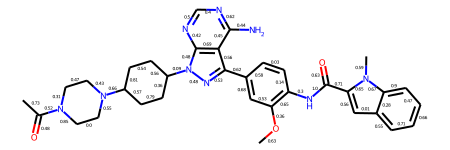

In [44]:
mol_2d

#### check rdkit_heatmap package
- use AllChem.EmbedMolecule(mol) to prevent the bad conformer id error

In [45]:
from rdkit.Chem import AllChem

In [46]:
from rdkit_heatmaps.molmapping import mapvalues2mol
from rdkit_heatmaps.utils import transform2png

In [47]:
k = 'A-770041'
smiles = smiles_dict[k]
mol = Chem.MolFromSmiles(smiles)
AllChem.EmbedMolecule(mol)
# mol = Chem.AddHs(mol)

AllChem.Compute2DCoords(mol)
mol.GetConformer(0)

[19:27:47] Molecule does not have explicit Hs. Consider calling AddHs()


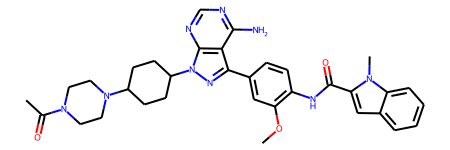

In [48]:
mol

In [49]:
bond_weights = []
for i, bond in enumerate(mol.GetBonds()):
    u, v = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
    if u > v:
        u, v = v, u
    bond_weights.append(edge_ss_dict[(u, v)])
    bond.SetProp('bondNote',str(edge_ss_dict[(u, v)]))

# bond_weights

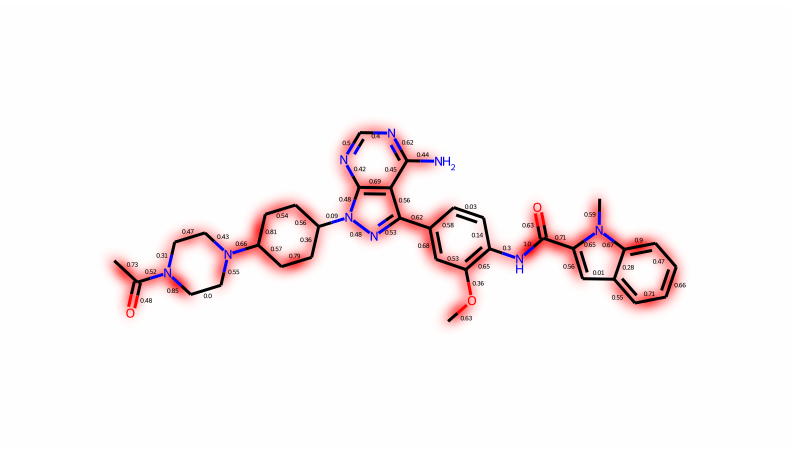

In [60]:
# mol = Chem.MolFromSmiles(smiles)
# AllChem.EmbedMolecule(mol)

canvas = mapvalues2mol(mol, bond_weights = bond_weights, bond_length=0.5, bond_width=0.3, value_lims=[-1, 1])
# canvas = mapvalues2mol(mol, bond_weights = bond_weights)

img = transform2png(canvas.GetDrawingText())
img

In [68]:
img.save('Amuvatinib_saliency_map.png')

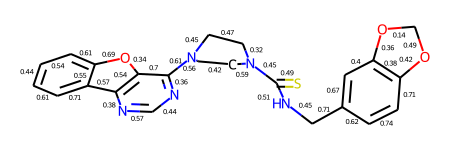

In [69]:
mol